<a href="https://www.kaggle.com/code/jayasuriyashanmugam/stock-analysis-ma?scriptVersionId=215962183" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Stocks Moving avaerage calculation to find out golden_cross_over and death_cross_over

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import yfinance  as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##Creating dataframe with yahoo finance

ticker = "HINDMOTORS.NS" 
stock = yf.Ticker(ticker)
data = stock.history(period="1y") 
df = pd.DataFrame(data).reset_index()

In [3]:
## Generating CENTRAL TENDENCY For last 200 days and last 50 days 
## Customize values based on your analysis

df["MA50"] = df["Close"].rolling(window=50).mean()
df["MA200"] = df["Close"].rolling(window=200).mean()

# Identify crossovers
df["Signal"] = 0
df.loc[df["MA50"] > df["MA200"], "Signal"] = 1
df.loc[df["MA50"] <= df["MA200"], "Signal"] = -1

# Detect where the crossover occurs
'''
If the Signal changes from -1 to 1, the difference will be 1 - (-1) = 2 (Golden Cross).
If the Signal changes from 1 to -1, the difference will be -1 - 1 = -2 (Death Cross).
'''
df["Crossover"] = df["Signal"].diff()

In [4]:
# Filter for crossover points
golden_cross = df[df["Crossover"] == 2]  # MA50 crosses above MA200
death_cross = df[df["Crossover"] == -2]  # MA50 crosses below MA200

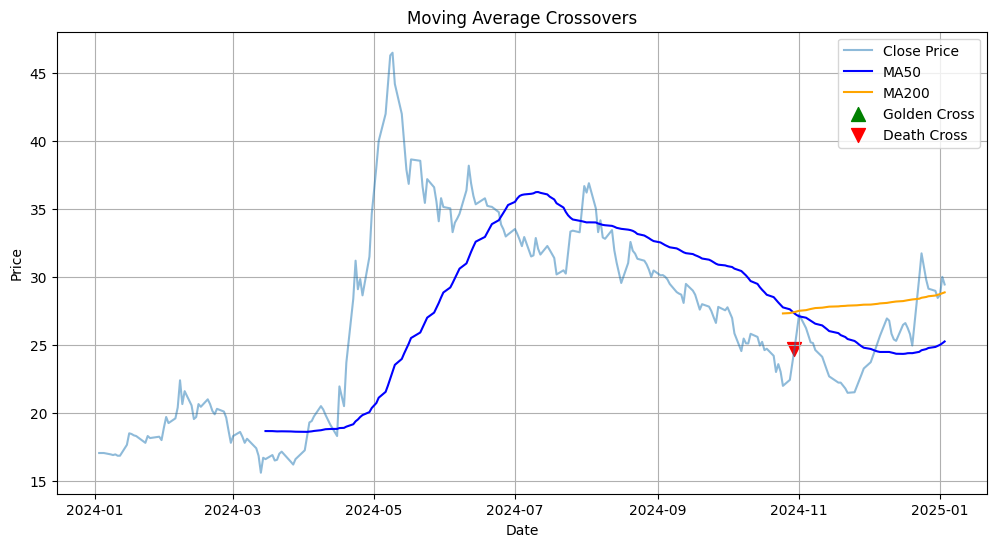

Golden Cross Dates:
Empty DataFrame
Columns: [Date, Close]
Index: []

Death Cross Dates:
                         Date      Close
202 2024-10-30 00:00:00+05:30  24.719999


In [5]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"], label="Close Price", alpha=0.5)
plt.plot(df["Date"], df["MA50"], label="MA50", color="blue")
plt.plot(df["Date"], df["MA200"], label="MA200", color="orange")

# Highlight crossover points
plt.scatter(golden_cross["Date"], golden_cross["Close"], label="Golden Cross", color="green", marker="^", s=100)
plt.scatter(death_cross["Date"], death_cross["Close"], label="Death Cross", color="red", marker="v", s=100)

plt.title("Moving Average Crossovers")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

# Print crossover dates
print("Golden Cross Dates:")
print(golden_cross[["Date", "Close"]])

print("\nDeath Cross Dates:")
print(death_cross[["Date", "Close"]])